In [1]:
import numpy as  np

class AdalineGD(object):
    def __init__ (self, eta=0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
    def fit (self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            print errors
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict (self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[-5.3287 -5.2357 -5.0029 -5.236  -5.2822 -5.8876 -5.0962 -5.422  -5.0032
 -5.3755 -5.608  -5.4688 -5.1892 -4.5373 -5.3746 -5.7475 -5.3284 -5.3287
 -6.0271 -5.4685 -5.8876 -5.4685 -4.537  -5.7481 -5.8882 -5.5618 -5.5618
 -5.515  -5.3752 -5.4223 -5.4688 -5.608  -5.515  -5.5147 -5.3755 -5.0026
 -5.3749 -5.3755 -4.8634 -5.4685 -5.1424 -4.9099 -4.8634 -5.5618 -6.0277
 -5.1892 -5.6083 -5.0962 -5.5615 -5.2822 -8.8256 -8.267  -9.0587 -7.1495
 -8.4533 -7.9415 -8.5001 -5.8919 -8.4998 -6.8702 -6.218  -7.6151 -7.382
 -8.4071 -6.6368 -8.2667 -7.895  -7.4288 -8.174  -7.0562 -8.4539 -7.4285
 -8.7797 -

In [4]:
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')

In [5]:
ax[0].set_xlabel('Epochs')

In [6]:
ax[0].set_ylabel('log(Sum-squared-error)')

In [7]:
ax[0].set_title('Adaline - Learning rate 0.01')

In [8]:
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[-1.043287 -1.042357 -1.040029 -1.04236  -1.042822 -1.048876 -1.040962
 -1.04422  -1.040032 -1.043755 -1.04608  -1.044688 -1.041892 -1.035373
 -1.043746 -1.047475 -1.043284 -1.043287 -1.050271 -1.044685 -1.048876
 -1.044685 -1.03537  -1.047481 -1.048882 -1.045618 -1.045618 -1.04515
 -1.043752 -1.044223 -1.044688 -1.04608  -1.04515  -1.045147 -1.043755
 -1.040026 -1.043749 -1.043755 -1.038634 -1.044685 -1.041424 -1.039099
 -1.038634 -1.045618 -1.050277 -1.041892 -1.046083 -1.040962 -1.045615
 -1.042822  0.901744  0.90733   0.899413  0.918505  0.905467  0.910585
  0.904999  0.931081  0.90

In [9]:
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')

In [10]:
ax[1].set_xlabel('Epochs')

In [11]:
ax[1].set_ylabel('Sum-squared-error')

In [12]:
ax[1].set_title('Adaline - Learning rate 0.0001')

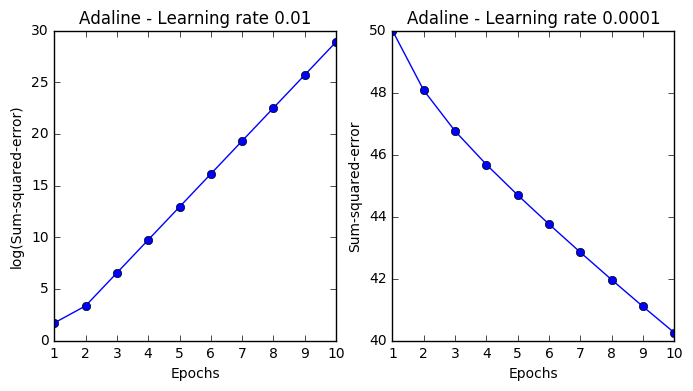

In [13]:
plt.show()

In [14]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.40706793  0.63519978  0.93062871  0.91010046  0.52113386 -0.13702109
  0.97739755  0.45383677  1.20552939  0.56790269 -0.00242692  0.61467153
  0.7492657   1.52148656 -0.25679936 -0.34462469  0.13216725  0.40706793
 -0.47921885  0.33977085 -0.13702109  0.33977085  1.24658588  0.20517668
  0.41278028  0.38653969  0.38653969  0.22570493  0.29300201  0.72873746
  0.61467153 -0.00242692  0.22570493 -0.04919576  0.56790269  0.65572802
  0.01810133  0.56790269  1.27282648  0.33977085  0.58843094  1.15876055
  1.27282648  0.38653969  0.07058252  0.7492657   0.27247377  0.97739755
  0.11163

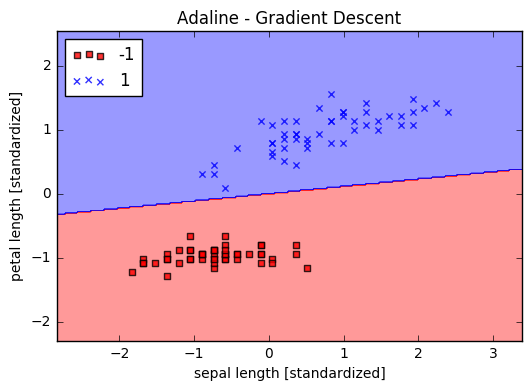

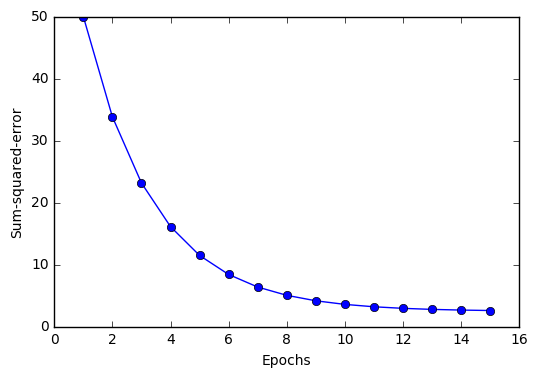

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl) 
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()